<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXAMPLE_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Stirred-Tank Heating Process: Constant Holdup

Name: Juan Manuel G.G

Date: February 2021

### 1. Process description 

The liquid inlet stream consists of a single component with a mass ﬂow rate $w_i$ and an inlet temperature $T_i$. The tank contents are agitated and heated using an electrical heater that provides a heating rate, $Q$

### 2. Assumptions 

1. Perfect mixing; thus, the exit temperature T is also the temperature of the tank contents

2. The inlet and outlet ﬂow rates are equal; thus, $w_i = w$ and the liquid holdup V is constant

3. The density ρ and heat capacity C of the liquid are assumed to be constant. Thus, their temperature dependence is neglected

4. Heat losses are negligible

### 3. Scheme of the process 

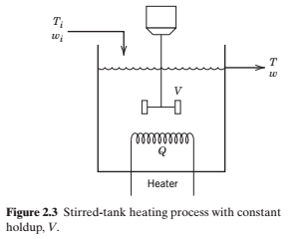

### Process network 

### 4. Data



### 5. Analysis

#### 5.1 Establish the model 

Energy balance for the system 

$$\frac{dU_{tot}}{dt} = w_i \hat{H}_i - w \hat{H} + Q_e$$

$$U_{tot} = U_{int} + U_{KE} + U_{PE}$$

In this case $U_{KE}$ and $U_{PE}$ are negligible

Also, a differential change in temperature, dT, produces a corresponding change in the internal energy per unit mass, $d\hat{U}_{int}$

$$d\hat{U}_{int} = d\hat{H} = C dT$$

$$mC \frac{ dT}{dt} = w_i \hat{H}_i - w \hat{H} + Q_e$$

Integrating $d\hat{H}$ we get 

$$ \hat{H} - \hat{H}_{ref}  = \int_{T}^{T_{ref}} CdT = C(T - T_{ref})$$

So we can write 

$$\hat{H} = C(T-T_{ref}), \hspace{0.5cm} \hat{H}_i = C(T_i-T_{ref})$$

Finally we get the differential equation for the system's temperature

$$m C \frac{ dT}{dt} = wC(T_i - T) + Q_e$$

Energy balance for the heating element 

$$m_e C_e \frac{ dT_e}{dt} = Q - Q_e$$

Where

$$Q_e = h_e A_e (T_e - T)$$ 

The term $h_eA_e$ is the product of the heat transfer coeffcient
and area available for heat transfer (convection)

So the model of the process is 

$$
\frac{ dT}{dt} = \frac{1}{mC}[wC(T_i - T) + h_e A_e (T_e - T)] \tag{1}
$$

$$
\frac{ dT_e}{dt} =\frac{1}{m_eC_e} [Q - h_e A_e (T_e - T)] \tag{2}
$$

#### 5.2 Steady state conditions 

In [38]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# establish symbols
m,  C, w, Ti, T, he, Ae, Te, me, Ce, Q = sp.symbols("m,  C, w, Ti, T, he, Ae, Te, me, Ce, Q")

In [7]:
# establish equations 
eq1 = sp.Eq(w*C*(Ti-T) + he*Ae(Te-T),0)
eq2 = sp.Eq(Q - he*Ae*(Te-T),0)

In [13]:
# solve equations for T and Te
sp.solve([eq1,eq2], [T,Te])

[(Ti + he*Ae(Q/(Ae*he))/(C*w), Ti + he*Ae(Q/(Ae*he))/(C*w) + Q/(Ae*he))]

Equating (1) and (2) to zero  

$$
\frac{1}{mC}[wC(T_i - T) + h_e A_e (T_e - T)] = 0 \tag{3}
$$

$$
\frac{1}{m_eC_e} [Q - h_e A_e (T_e - T)] = 0 \tag{4}
$$

Solving (3) and (4) for $T$ and $T_e$ we get 

$$T = T_i + \frac{Q}{wC}, \hspace{1cm} T_e = T_i + Q(\frac{1}{wC}+ \frac{1}{h_eA_e})$$

In [14]:
def steady_state(p):

     T = Ti + Q/(w*C)
     Te = Q/(he*Ae) + T

     return [T, Te]

#### 5.4 Simulate the model 

In [33]:
# write the model 
def heating(s, time, parms):

    # parameters 
    m = parms[0]
    C = parms[1]
    w = parms[2]
    Ti = parms[3]
    he = parms[4]
    Ae = parms[5]
    me = parms[6]
    Ce = parms[7]
    Q = parms[8]

    # state variables 
    Ts = s[0]
    Te = s[1]

    # energy balance for the system 
    dTsdt = (w*C*(Ti-Ts) + he*Ae*(Te-Ts))/(m*C)

    # energy balance for the heating element
    dTedt = (Q - he*Ae*(Te-Ts))/(me*Ce)

    return [dTsdt, dTedt]

In [34]:
# establish parameters 
m = 1.0
C = 200.0
w = 0.1
Ti = 100.0 # °C
he = 200.0
Ae = 0.1
me = 0.1
Ce = 200.0
Q = 5000.0 # kcal/min
parms = [m, C, w, Ti, he, Ae, me, Ce, Q] 

# initial conditions 
s = [150, 200]

# integration time 
time = np.linspace(0,100,100)

In [35]:
# simulate the process
out = odeint(heating, s, time, args= (parms, ))

In [36]:
# save results
Ts = out[:,0]
Te = out[:,1]

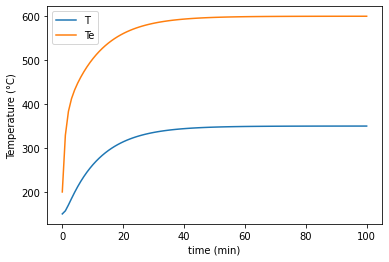

In [43]:
# show results 
plt.plot(time, out)
plt.xlabel("time (min)")
plt.ylabel("Temperature (°C)")
plt.legend(["T", "Te"])

In [44]:
steady_state(parms)

[350.0, 600.0]

### EXAMPLE 2.4

An electrically heated stirred-tank process can be modeled by (1) and (2) or by the following equation 

$$
\frac{m m_e C_e}{w h_e A_e} \frac{d^{2}T}{dt^{2}} + (\frac{m_eC_e}{h_eA_e} + \frac{m_e C_e}{w C} + \frac{m}{w})\frac{dT}{dt} + T = \frac{m_e C_e}{h_e A_e} \frac{dT_i}{dt} + T_i + \frac{1}{wC}Q \tag{5}
$$

Process design and operating conditions are characterized by the following four parameter groups 

$$ 
\frac{m}{w} = 10\ min, \hspace{1cm} \frac{m_eC_e}{h_eA_e} = 1.0\ min
$$

$$ 
\frac{m_e C_e}{w C} = 1.0\ min, \hspace{1cm} \frac{1}{wC} = 0.05°C\min/kcal
$$

The nominal values of $Q$ and $T_i$ are:

$$\bar{Q} = 5000\ kcal/min, \hspace{1cm} \bar{T}_i = 100°C$$

a) Calculate the nominal steady state temperature 

Making $\frac{d^{2}T}{dt^{2}}$ and $\frac{dT}{dt}$ to zero in (5) we get 

$$T = T_i + \frac{Q}{cw}$$

The same result that we got with (1) and (2). Substituting the values we get 

$$T = 100°C + 5000\ kcal/min * 0.05°C\min/kcal = 350°C$$

In [45]:
steady_state(parms)

[350.0, 600.0]

(b) Assume that the process is initially at the steady state determined in part (a). Calculate the response, T(t), to a sudden change in Q from 5000 to 5400 kcal/min using (5). Plot the temperature response 

In (5) substituting the parameter groups we get 

$$
10\frac{d^2T}{dt^2} + 12\frac{dT}{dt} + T = 370 \tag{6}
$$

With the initial conditions from (a) $T(0) = 350°C$ and $\frac{dT}{dt} = 0$

So 

$$m^2 + 12m + 1 = 0 \hspace{1cm} \rightarrow m = -0.09,\ -1.1099 $$

$$T_h(t) = C_1e^{-0.09t} + C_2e^{-1.1099t}$$

Also we have 

T_p(t) = A

Substituting in (5) we get

$$A = 370$$

Therefore the general solution is 
$$
T_g(t) = C_1e^{-0.09t} + C_2e^{-1.1099t} + 370
$$

Evaluating the initial conditions 

$$
350 = C_1 + C_2 + 370  = 0\tag{7}
$$

$$
 -0.09C_1e^{-0.09t} -1.1099C_2e^{-1.1099t} = 0\tag{8}
$$

Solving (7) and (8) for $C_1$ and $C_2$

$$C_1 = -25.8015, \ C_2 = 5.8015$$

So the solution is 

$$
T_g(t) = -25.8015e^{-0.09t} + 5.8015e^{-1.1099t} + 370
$$

In [46]:
def T_b(t):
    T = -25.8015*np.exp(-0.09*t) + 5.8015*np.exp(-1.1099*t) + 370
    return T

Text(0, 0.5, 'temperature (°C)')

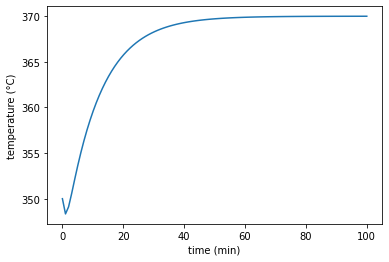

In [48]:
plt.plot(time, T_b(time))
plt.xlabel("time (min)")
plt.ylabel("temperature (°C)")

Suppose that it can be assumed that the term $m_eC_e/h_eA_e$ is small relative to other terms in (5). Calculate the reponse $T(t)$ for the conditions of part (b), using a first-oder differential equation approximation to (5). Plot $T(t)$ on the graph for part (b)

$$
12\frac{dT}{dt}+ T = 370
$$

With the initial condition $T(0) = 350°C$

The solution is 

$$
T(t) = -20e^{\frac{t}{12}} + 370
$$

In [49]:
def T_c(t):
    T = -20*np.exp(-t/12) + 370
    return T

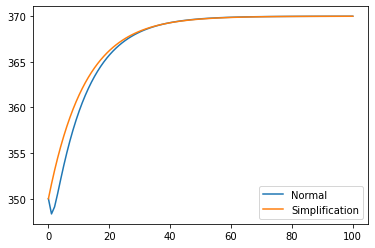

In [52]:
plt.plot(time,T_b(time),time,T_c(time))
plt.legend(["Normal","Simplification"])

For purposes of process control, this approximate model is likely to be as useful as the more complicated, exact model